### The Sparks Foundation
### Web development Intern
### Name: Shashank Shukla
#### TASK 2 Prediction using Supervised Machine Leraning
#### Predict the percentage of a student based on no. of study hours. 


In [1]:
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [2]:
import os

In [3]:
os.chdir('drive/MyDrive/Grip')

In [12]:
# importing all the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
ls data

student_scores.csv


In [20]:
data = pd.read_csv('data/student_scores.csv')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
data.shape

(25, 2)

In [22]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
#finding any missing values, if present we will clean data and then use it for prediction.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Data visualization**

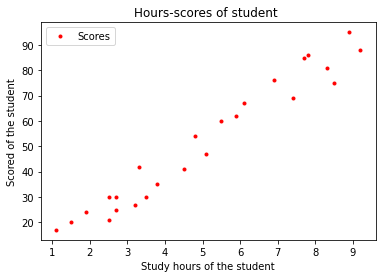

In [25]:
#Data visaulization for hours-score of the student.
data.plot(x='Hours',y='Scores',color='red',style='.')
plt.title('Hours-scores of student ')
plt.xlabel('Study hours of the student')
plt.ylabel('Scored of the student')
plt.show()

In [26]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

**Train the model using training data and mention the target column**.

In [28]:
#train data and mention target column.
train=data.drop(['Scores'],axis=1)
test=data['Scores']

In [29]:
# Spliting the data into training and testing set by mentioning train-test ratio. 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [30]:
#fit data into the model.
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

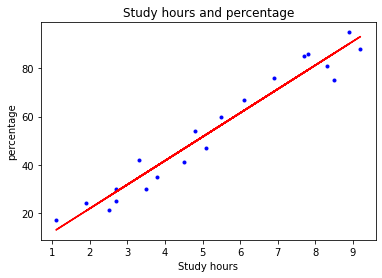

In [31]:
# Visualization of Training Set Result
plt.scatter(X_train, y_train, color='blue',marker='.')
plt.plot(X_train, reg.predict(X_train), color='red');
plt.title("Study hours and percentage")
plt.xlabel("Study hours")
plt.ylabel("percentage")
plt.show()

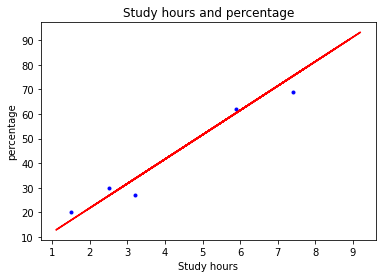

In [32]:
#Visualization of  Test set results
plt.scatter(X_test, y_test, color = 'blue',marker='.')
plt.plot(X_train, reg.predict(X_train), color = 'red')
plt.title("Study hours and percentage")
plt.xlabel("Study hours")
plt.ylabel("percentage")
plt.show()

In [33]:
# Predicting the scores
print(X_test) 
pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [34]:
# Comparing Actual and  Predicted values.
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
data1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Lets predict the score of the student whose study hours is 9.25 hrs.**

In [35]:
hours = (np.array(9.25).reshape(1,-1))
own_pred = reg.predict(hours)
print("No. of  study hours of the student = {}".format(hours))
print("Predicted score is  = {}".format(own_pred[0]))

No. of  study hours of the student = [[9.25]]
Predicted score is  = 93.69173248737539


**The predicted score of student whose study hours is 9.25 hrs is 93.69.**

In [36]:
# To calculate score of our model.
reg.score(X_train, y_train)

0.9515510725211553

In [37]:
# To calculate mean absolute error.
print('Mean Absolute Error:',metrics .mean_absolute_error(y_test, pred))

Mean Absolute Error: 4.183859899002982
